## Case Study 1(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [1]:
import scipy
from scipy.stats import skew,norm,zscore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1.2 import and put the train and test datasets in  pandas dataframe

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1.3 display the first five rows of the train dataset.

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of samples and features

In [5]:
test.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
878,2339,20,RL,76.0,10612,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2007,WD,Family


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### 1.6 Save the 'Id' column

In [7]:
a = test['Id']

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [8]:
test.drop(columns='Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### 1.8 check again the data size after dropping the 'Id' variable

In [9]:
test.shape

(1459, 80)

## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

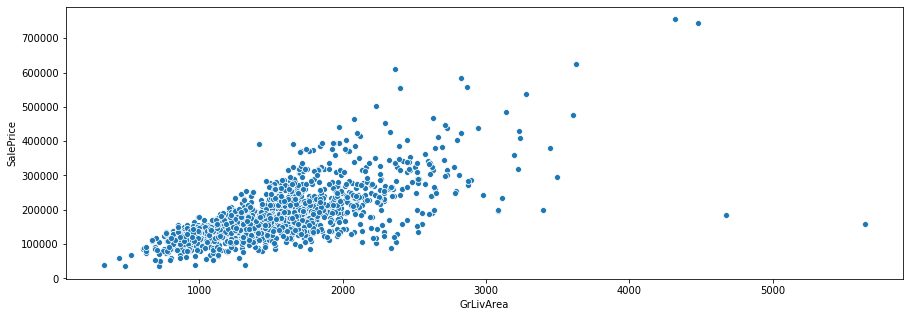

In [10]:
# create subplots 
fig,ax = plt.subplots(1,1,figsize=(15,5))
#create scatter plots for train['GrLivArea'],  train['SalePrice']
sns.scatterplot(data=train,x='GrLivArea',y='SalePrice')
plt.show()

#### observation:


### 1.9 b) Deleting outliers.And your observation?

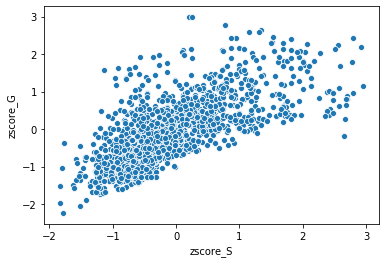

In [11]:
#Check the graphic again
train['zscore_S'] = zscore(train['SalePrice'])
train['zscore_G'] = zscore(train['GrLivArea'])
a = train[(train['zscore_S']<3) & (train['zscore_S']>-3)]
b = train[(train['zscore_G']<3) & (train['zscore_G']>-3)]
#create scatterplot for train['GrLivArea'], train['SalePrice']
sns.scatterplot(data=train,x=a['zscore_S'],y=b['zscore_G'])
plt.show()

#### observation:
  

### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

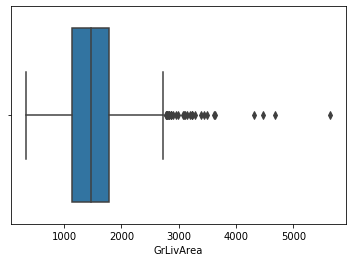

In [12]:
sns.boxplot(data=train,x='GrLivArea')

### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

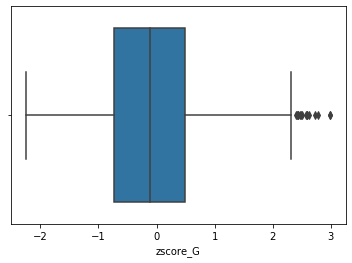

In [13]:
sns.boxplot(data=train,x=b['zscore_G'])
#some outliers remain

## 1.10 Checking the skeweness for saleprice.And your observation?

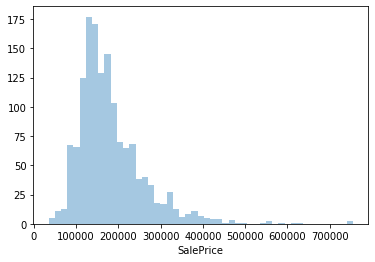

1.8828757597682129


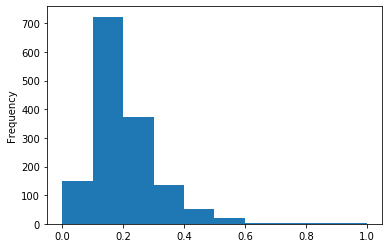

1.8828757597682122


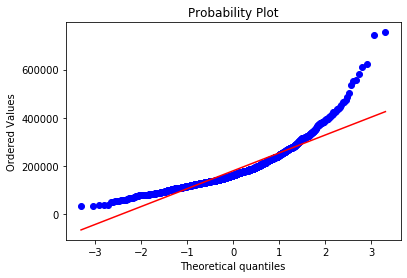

In [14]:
# create histogram for saleprice
sns.distplot(train['SalePrice'],kde=False)
plt.show()
print(train['SalePrice'].skew())

# Get the fitted parameters used by the function
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
train['minmax'] = minmax.fit_transform(train[['SalePrice']])
#Now plot the distribution
train['minmax'].plot.hist()
plt.show()
print(train['minmax'].skew())
#Get also the QQ-plot
from scipy import stats
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

### observation:


### 1.10 a) Apply Log-transformation of the target variable.And your observation?

In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train['Sale_convert'] =  np.log1p(train['SalePrice'])

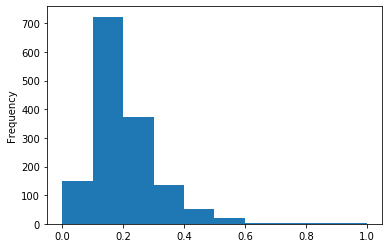

1.8828757597682122


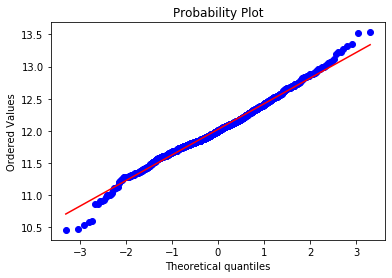

In [16]:
#Check the new distribution 
train.head()

# Get the fitted parameters used by the function
train['minmax'].plot.hist()
plt.show()
#Now plot the distribution

print(train['minmax'].skew())
#Get also the QQ-plot
from scipy import stats
stats.probplot(train['Sale_convert'],plot=plt)
plt.show()

#### observation:


### 1.11 concatenate the train and test data in the same dataframe

In [17]:
#all_data = pd.concat
hello = pd.concat([train,test])
hello.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,minmax,zscore_G,zscore_S
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,8,856.0,AllPub,0,2003,2003,2008,0.241078,0.370333,0.347273
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,6,1262.0,AllPub,298,1976,1976,2007,0.203583,-0.482512,0.007288
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,6,920.0,AllPub,0,2001,2002,2008,0.261908,0.515013,0.536154
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,7,756.0,AllPub,0,1915,1970,2006,0.145952,0.383659,-0.515281
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,9,1145.0,AllPub,192,2000,2000,2008,0.298709,1.299326,0.869843


In [18]:
# Drop the SalePrice
hello.drop(columns='SalePrice')

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,minmax,zscore_G,zscore_S
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,8,856.0,AllPub,0,2003,2003,2008,0.241078,0.370333,0.347273
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,6,1262.0,AllPub,298,1976,1976,2007,0.203583,-0.482512,0.007288
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,6,920.0,AllPub,0,2001,2002,2008,0.261908,0.515013,0.536154
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,7,756.0,AllPub,0,1915,1970,2006,0.145952,0.383659,-0.515281
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,9,1145.0,AllPub,192,2000,2000,2008,0.298709,1.299326,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,5,546.0,AllPub,0,1970,1970,2006,NaN,NaN,NaN
1455,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,6,546.0,AllPub,0,1970,1970,2006,NaN,NaN,NaN
1456,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,7,1224.0,AllPub,474,1960,1996,2006,NaN,NaN,NaN
1457,970,0,0,NaN,3,1Fam,TA,Av,337.0,0.0,...,6,912.0,AllPub,80,1992,1992,2006,NaN,NaN,NaN


### 1.12 Cecking the all Missing Data?

In [47]:
hello.isna().sum()[hello.isna().sum()!=0]

Alley           2721
Fence           2348
MiscFeature     2814
PoolQC          2909
SalePrice       1459
Sale_convert    1459
Utilities          2
minmax          1459
zscore_G        1459
zscore_S        1459
dtype: int64

### 1.13 plot the missing values using barplot?

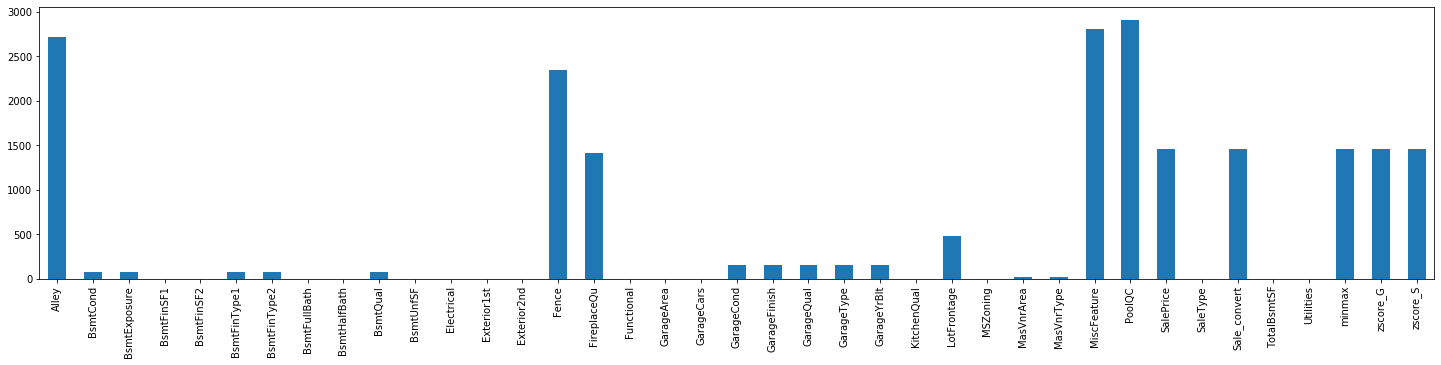

In [20]:
#create subplots
fig, ax = plt.subplots(1,1,figsize=(25,5))
#create barplot for all missing values
hello.isna().sum()[hello.isna().sum()!=0].plot.bar()
plt.show()

### 1.14 check the Data Correlation using heatmap.And your observation?

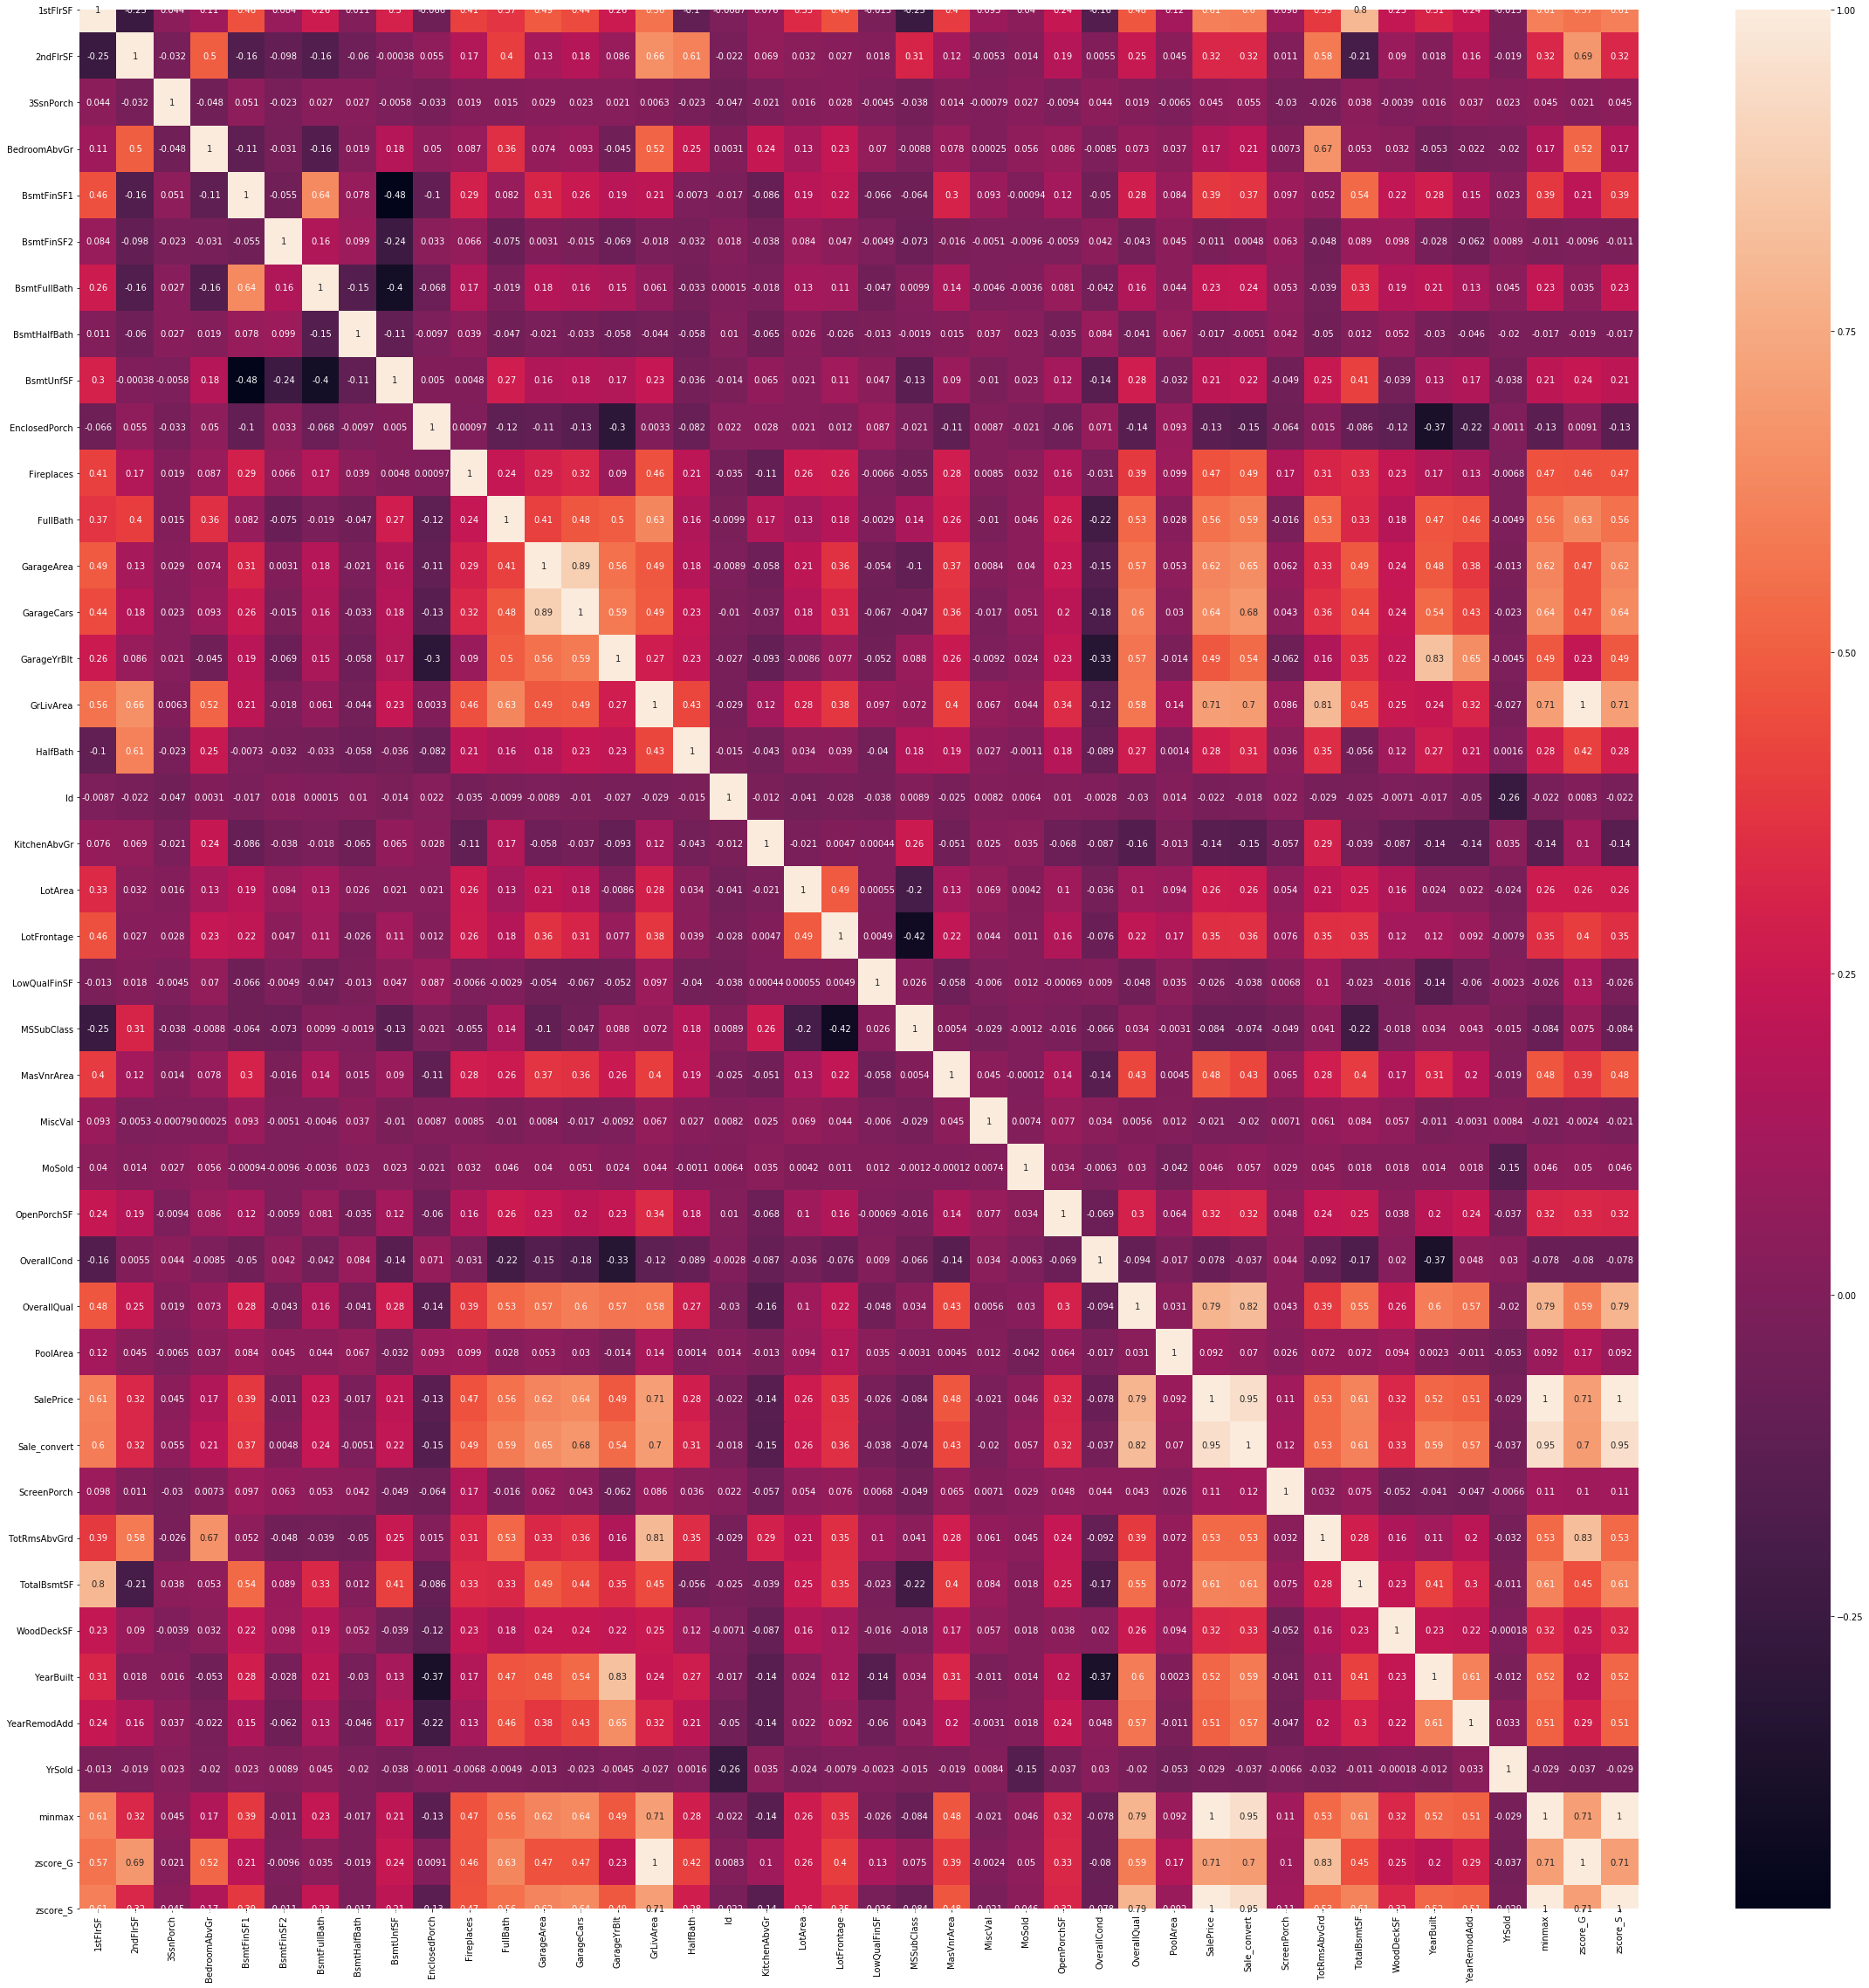

In [21]:
#Correlation map to see how features are correlated with SalePrice
plt.figure(figsize=(40,40))
sns.heatmap(hello.corr(),annot=True)
plt.show()

#### observation:
   

#### 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

#### MiscFeature : 
data description says NA means "no misc feature"

#### Alley : 
data description says NA means "no alley access"

Fence : 
data description says NA means "no fence"

### 1.16 Check remaining missing values if any 

In [48]:
hello.isna().sum()[hello.isna().sum()!=0]

Alley           2721
Fence           2348
MiscFeature     2814
PoolQC          2909
SalePrice       1459
Sale_convert    1459
Utilities          2
minmax          1459
zscore_G        1459
zscore_S        1459
dtype: int64

In [49]:
# FireplaceQu : data description says NA means "no fireplace"
hello['FireplaceQu'].fillna(value='no fireplace',inplace=True)

In [50]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
hello['LotFrontage'] = hello.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(value=x.median()))
hello['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 2919, dtype: float64

In [51]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None
hello['GarageType'].fillna(value='None',inplace=True)
hello['GarageFinish'].fillna(value='None',inplace=True)
hello['GarageQual'].fillna(value='None',inplace=True)
hello['GarageCond'].fillna(value='None',inplace=True)

In [52]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)
hello['GarageYrBlt'].fillna(value=0,inplace=True)
hello['GarageArea'].fillna(value=0,inplace=True)
hello['GarageCars'].fillna(value=0,inplace=True)

In [53]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement
hello['BsmtFinSF1'].fillna(value=0,inplace=True)
hello['BsmtFinSF2'].fillna(value=0,inplace=True)
hello['BsmtUnfSF'].fillna(value=0,inplace=True)
hello['TotalBsmtSF'].fillna(value=0,inplace=True)
hello['BsmtFullBath'].fillna(value=0,inplace=True)
hello['BsmtHalfBath'].fillna(value=0,inplace=True)

In [54]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.
hello['BsmtQual'].fillna(value='No basement',inplace=True)
hello['BsmtCond'].fillna(value='No basement',inplace=True)
hello['BsmtExposure'].fillna(value='No basement',inplace=True)
hello['BsmtFinType1'].fillna(value='No basement',inplace=True)
hello['BsmtFinType2'].fillna(value='No basement',inplace=True)

In [55]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.
hello['MasVnrType'].fillna(value='None',inplace=True)
hello['MasVnrArea'].fillna(value=0,inplace=True)

In [56]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'
hello['MSZoning'].fillna(value='RL',inplace=True)

In [57]:
#Functional : data description says NA means typical
hello['Functional'].fillna(value='Typ',inplace=True)

In [58]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.
hello['Electrical'].fillna(value='SBrkr',inplace=True)

In [59]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.
hello['KitchenQual'].fillna(value='TA',inplace=True)

In [60]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string
print(hello['Exterior2nd'].mode())
print(hello['Exterior1st'].mode())
hello['Exterior1st'].fillna(value='VinylSd',inplace=True)
hello['Exterior2nd'].fillna(value='VinylSd',inplace=True)

0    VinylSd
dtype: object
0    VinylSd
dtype: object


In [61]:
#SaleType : Fill in again with most frequent which is "WD"
hello['SaleType'].fillna(value='WD',inplace=True)

In [62]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None
hello['MSSubClass'].fillna(value='None',inplace=True)

### 1.17 Check again remaining missing values if any.And your observation?

In [63]:
hello.isna().sum()[hello.isna().sum()!=0]

Alley           2721
Fence           2348
MiscFeature     2814
PoolQC          2909
SalePrice       1459
Sale_convert    1459
Utilities          2
minmax          1459
zscore_G        1459
zscore_S        1459
dtype: int64

#### observation:
    

In [38]:
#Removed all NaN and filled NA values in the required columns

# 1.18 features engeneering

#### 1.18 a) Transforming some numerical variables that are really categorical

In [65]:
#MSSubClass=The building class


#Changing OverallCond into a categorical variable
hello['OverallCond'] = hello['OverallCond'].apply(lambda d: str(d))

#Year and month sold are transformed into categorical features.
hello['YrSold'] = hello['YrSold'].apply(lambda d: str(d))
hello['MoSold'] = hello['MoSold'].apply(lambda d: str(d))
print(hello['OverallCond'])
print(hello['YrSold'])
print(hello['MoSold'])

0       5
1       8
2       5
3       5
4       5
       ..
1454    7
1455    5
1456    7
1457    5
1458    5
Name: OverallCond, Length: 2919, dtype: object
0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1454    2006
1455    2006
1456    2006
1457    2006
1458    2006
Name: YrSold, Length: 2919, dtype: object
0        2
1        5
2        9
3        2
4       12
        ..
1454     6
1455     4
1456     9
1457     7
1458    11
Name: MoSold, Length: 2919, dtype: object


#### 1.8b) label Encoding some categorical variables that may contain information in their ordering set

In [40]:
##Below I have label encoded two columns for examples. Similarly, more columns can be LabelEncoded
# process columns, apply LabelEncoder to categorical features
print(hello.dtypes[hello.dtypes=='object'])
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
hello['GarageType'] = label.fit_transform(hello['GarageType'])
hello['Heating'] = label.fit_transform(hello['Heating'])
# shape 
print(hello.shape)
hello[['Heating','GarageType']]

Alley            object
BldgType         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
BsmtQual         object
CentralAir       object
Condition1       object
Condition2       object
Electrical       object
ExterCond        object
ExterQual        object
Exterior1st      object
Exterior2nd      object
Fence            object
FireplaceQu      object
Foundation       object
Functional       object
GarageCond       object
GarageFinish     object
GarageQual       object
GarageType       object
Heating          object
HeatingQC        object
HouseStyle       object
KitchenQual      object
LandContour      object
LandSlope        object
LotConfig        object
LotShape         object
MSZoning         object
MasVnrType       object
MiscFeature      object
MoSold           object
Neighborhood     object
OverallCond      object
PavedDrive       object
PoolQC           object
RoofMatl         object
RoofStyle        object
SaleCondition   

,Heating,GarageType
0,1,1
1,1,1
2,1,1
3,1,5
4,1,1
...,...,...
1454,1,6
1455,1,4
1456,1,5
1457,1,6


### 1.19 Introduction to Test and Train


In [41]:
from sklearn.model_selection import train_test_split

### 1.20 Extract the independent variable X and dependent variable Y?

In [42]:
x = hello.iloc[:,:-1]
y = hello.iloc[:,-1]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

### 1.21 Split the data into train and test set(70/30)?

In [43]:
xtrain.shape

(2043, 84)

In [44]:
ytrain.shape

(2043,)

In [45]:
xtest.shape

(876, 84)

In [46]:
ytest.shape

(876,)

# The End